In [1]:
import pandas as pd
import numpy as np
from biopandas.pdb import PandasPdb
from sklearn import svm
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'text.usetex': False,"svg.fonttype": 'none'})
%matplotlib inline

# function to get the distance between two hexaloops
def get_dists_ang(pdb_file,loops):
    loops = [list(range(int(x.split('-')[0]),int(x.split('-')[1])+1)) for x in loops.split(',')]
    pdb = PandasPdb().read_pdb(pdb_file)
    atoms = pdb.df['ATOM']
    atoms = atoms[atoms.atom_name=="C1'"]
    centroids, planes, dists = [], [], []
    for loop in loops:
        pos = atoms[atoms.residue_number.isin(loop)][['x_coord','y_coord','z_coord']].to_numpy()
        centroids.append(pos.mean(axis=0))
        clf = svm.SVC(kernel='linear')
        clf.fit(pos,[0,0,0,1,1,1])
        planes.append(clf.coef_[0])
    for i,(c0,p0) in enumerate(zip(centroids,planes)):
        for c1,p1 in zip(centroids[i+1:],planes[i+1:]):
            dist = np.linalg.norm(c0-c1)
            # angle needs revisiting
            ang = (180/np.pi) * np.arccos(np.dot(p0, p1) / (np.linalg.norm(p0) * np.linalg.norm(p1)))
            dists.append(dist)
    return dist

In [2]:
# get distances for all SL5 domains

results = []

# SARS-CoV-2
loops = '200-205,238-243'
pdb_files = glob('../models/auto-drrafter_erraser/SARS-CoV-2/*/SARS_CoV_2-SL5_*all_models_all_fits_FINAL_R?.out.*.pdbFINISHED_1.pdb')
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    res = res[:4] + ['-'] + res[4:]
    res.append(get_dists_ang(pdb_f,loops))
    res.append('ab')
    results.append(res[2:])

# SARS-CoV-1
loops = '199-204,237-242'
pdb_files = glob('../models/auto-drrafter_erraser/SARS-CoV-1/*/SARS_CoV_1*all_models_all_fits_FINAL_R?.out.*.pdbFINISHED_1.pdb')
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    res = res[:4] + ['-'] + res[4:]
    res.append(get_dists_ang(pdb_f,loops))
    res.append('ab')
    results.append(res[2:])
    
# MERS
loops = '246-251,284-289'
pdb_files = glob('../models/auto-drrafter_erraser/MERS/conf?/*/MERS*all_models_all_fits_FINAL_R?.out.*.pdbFINISHED_1.pdb')
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    res.append(get_dists_ang(pdb_f,loops))
    res.append('ab')
    results.append(res[2:])
    
# BtCoV
loops = '228-233,266-271'
pdb_files = glob('../models/auto-drrafter_erraser/BtCoV-HKU5/conf?/*/Bt*all_models_all_fits_FINAL_R?.out.*.pdbFINISHED_1.pdb')
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    if res[5]!='eternafold' and not (res[4]=='conf4' and res[5]=='libraryDMS'):
        res.append(get_dists_ang(pdb_f,loops))
        res.append('ab')
        results.append(res[2:])

        
# 229e
loops = '192-197,233-238'
pdb_files = glob('../models/auto-drrafter_erraser/HCoV-229E/manual/H*all_models_all_fits_FINAL_R?.out.*.pdb')
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    res = res[:4] + ['-'] + res[4:]
    res.append(get_dists_ang(pdb_f,loops))
    res.append('ab')
    results.append(res[2:])
loops = '192-197,262-267'
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    res = res[:4] + ['-'] + res[4:]
    res.append(get_dists_ang(pdb_f,loops))
    res.append('bc')
    results.append(res[2:])        
loops = '233-238,262-267'
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    res = res[:4] + ['-'] + res[4:]
    res.append(get_dists_ang(pdb_f,loops))
    res.append('ac')
    results.append(res[2:])        
        
# CASP
loops = '42-47,80-85'
pdb_files = glob('../data/CASP/*/*.pdb')
for pdb_f in pdb_files:
    res = pdb_f.split('/')
    res = res[:4] + ['-'] + ['-'] + res[4:]
    res.append(get_dists_ang(pdb_f,loops))
    res.append('ab')
    results.append(res[2:])

In [3]:
df = pd.DataFrame(results,columns=['modeling','species','conformation','secondary structure','models','distance','loop'])
df['sc'] = df.species+df.conformation
df['pt'] = df.modeling+df.species

In [4]:
# add to the dataframes the angles for all SL5 domains
# angles retrieved from pymol script, found in analysis/angle_scipts.txt

results = []
SARS2_angles = {'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 84.07066290763606, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 83.84728387326737, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 84.02039462082834, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 84.03690940637725, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 83.14112203835344, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 83.95775747169688, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 84.25788136549598, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 84.11430870040085, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 83.95498684830295, 'SARS_CoV_2-SL5_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 84.60851386821724, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.10.pdbFINISHED_1': 84.43024231164387, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.1.pdbFINISHED_1': 83.92369377212042, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.2.pdbFINISHED_1': 84.53993402499309, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.3.pdbFINISHED_1': 84.47584392808045, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.4.pdbFINISHED_1': 83.90836479645141, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.5.pdbFINISHED_1': 83.65557763736214, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.6.pdbFINISHED_1': 84.09691529721316, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.7.pdbFINISHED_1': 83.46675771420823, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.8.pdbFINISHED_1': 84.53824169393653, 'SARS_CoV_2-SL5_libraryDMS_all_models_all_fits_FINAL_R4.out.9.pdbFINISHED_1': 83.98707370781499, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 84.48689880272717, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 84.45977079159199, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 84.75199554483058, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 85.35612746188617, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 84.6387444959848, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 84.7654622112648, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 84.53706239922863, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 84.39299545060746, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 85.0571086153457, 'SARS_CoV_2-SL5_m2seq_librarySHAPE_eternafold_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 84.89167413253791}
for model, angle in SARS2_angles.items():
    results.append(['auto-drrafter_erraser','SARS-CoV-2','-',model,angle,np.nan])
SARS2_casp_angles = {'R1149TS029_1': -13.242208965625773, 'R1149TS029_2': 75.3315344517749, 'R1149TS029_3': -16.722926120723134, 'R1149TS029_4': -73.10472358149953, 'R1149TS035_1': 12.50304263809898, 'R1149TS035_2': -126.00853139004681, 'R1149TS035_3': 113.05076205524155, 'R1149TS035_4': 49.573017438369696, 'R1149TS035_5': 77.73114469225621, 'R1149TS054_1': 93.78050241536782, 'R1149TS054_2': -145.47566087834792, 'R1149TS054_3': -41.12562540202277, 'R1149TS054_4': -43.53656358731097, 'R1149TS054_5': 71.35426072503621, 'R1149TS076_1': 131.6620533178964, 'R1149TS076_2': 24.42321240594816, 'R1149TS076_3': -55.44974326664964, 'R1149TS076_4': -38.42149818124498, 'R1149TS076_5': 58.76067210913725, 'R1149TS081_1': -34.45482724916163, 'R1149TS081_2': -70.73014953487996, 'R1149TS081_3': -18.63841198047183, 'R1149TS081_4': -168.82553500145997, 'R1149TS081_5': -71.37006314424413, 'R1149TS091_1': 174.81435999762087, 'R1149TS091_2': 166.4616787674026, 'R1149TS091_3': 173.07902041604504, 'R1149TS091_4': 169.82198448255878, 'R1149TS091_5': -173.3696785971613, 'R1149TS097_1': 150.5434931774354, 'R1149TS097_2': 111.99705701905826, 'R1149TS110_1': -25.71133073312973, 'R1149TS110_2': -97.3127627021127, 'R1149TS110_3': -58.80098561699029, 'R1149TS110_4': 57.0431356005535, 'R1149TS119_1': 138.5439053483786, 'R1149TS119_2': -167.45135441344698, 'R1149TS119_3': 125.16498555409211, 'R1149TS119_4': -53.232008297961784, 'R1149TS119_5': 138.65834414647279, 'R1149TS125_1': 14.547941895458173, 'R1149TS125_2': 155.3404382121379, 'R1149TS125_3': 96.78148982659015, 'R1149TS125_4': -128.79609246243893, 'R1149TS125_5': -45.4760385531649, 'R1149TS128_1': 88.00357999897024, 'R1149TS128_2': -30.889930339058612, 'R1149TS128_3': 47.39428542138111, 'R1149TS128_4': 108.17278764339127, 'R1149TS128_5': -83.96395052114755, 'R1149TS131_1': -160.2916114167979, 'R1149TS131_2': -80.85603515930967, 'R1149TS131_3': -136.39050828271354, 'R1149TS131_4': 73.42486564829916, 'R1149TS131_5': 38.46505759988313, 'R1149TS147_1': -124.84645769226242, 'R1149TS147_2': -127.06962588042326, 'R1149TS147_3': -123.38562596579531, 'R1149TS147_4': -105.65895024419416, 'R1149TS147_5': -148.09359715327776, 'R1149TS177_1': -145.06798065276936, 'R1149TS185_1': -59.865270828102794, 'R1149TS185_2': -52.25923147479873, 'R1149TS185_3': -60.251894259185605, 'R1149TS185_4': -47.92896577438655, 'R1149TS185_5': -44.88584435980112, 'R1149TS227_1': -134.2582589907097, 'R1149TS227_2': 137.48544729539395, 'R1149TS227_3': -119.15994693796378, 'R1149TS227_4': -114.85135132240487, 'R1149TS227_5': -142.81753821686564, 'R1149TS229_1': 73.30982635868197, 'R1149TS229_2': 89.0070491149697, 'R1149TS229_3': 42.536294477868886, 'R1149TS229_4': -84.40356249094484, 'R1149TS229_5': 78.44671564080342, 'R1149TS232_1': 41.0227229079055, 'R1149TS232_2': 38.86018729751581, 'R1149TS232_3': 37.3245396857753, 'R1149TS232_4': -142.3339716022284, 'R1149TS232_5': 104.87780696488475, 'R1149TS235_1': -32.360335728698125, 'R1149TS235_2': 39.11483661458666, 'R1149TS235_3': 33.23087290682563, 'R1149TS235_4': -38.160711013621494, 'R1149TS235_5': 17.912180909675655, 'R1149TS238_1': -51.74757326170306, 'R1149TS238_2': -59.08373834347128, 'R1149TS239_1': 71.40141604459475, 'R1149TS239_2': 77.48696094986443, 'R1149TS239_3': -66.77993695272961, 'R1149TS239_4': 49.777629211561376, 'R1149TS239_5': -73.55576386327482, 'R1149TS245_1': 102.47314223527982, 'R1149TS245_2': 141.3564048163356, 'R1149TS245_3': 88.34437438083387, 'R1149TS245_4': -124.73123676093917, 'R1149TS245_5': -136.41966470048825, 'R1149TS248_1': 112.44482910594068, 'R1149TS248_2': -34.62920736358763, 'R1149TS248_3': 18.997328416170962, 'R1149TS248_4': 19.583163022630828, 'R1149TS248_5': 18.82929697772408, 'R1149TS287_1': 138.24046211950585, 'R1149TS287_2': -131.85809998766317, 'R1149TS287_3': -102.60949638603978, 'R1149TS287_4': 60.4773331368509, 'R1149TS287_5': -18.817406327412492, 'R1149TS385_1': 102.09990033379826, 'R1149TS385_2': 141.35155742657767, 'R1149TS385_3': 87.93893837895419, 'R1149TS385_4': -124.11541178778394, 'R1149TS385_5': -136.36727532047493, 'R1149TS392_1': 134.77704853295126, 'R1149TS392_2': -13.944518986808468, 'R1149TS392_3': 156.5564674752491, 'R1149TS392_4': -51.98965604653226, 'R1149TS392_5': -33.67051118266059, 'R1149TS416_1': 20.33335409668089, 'R1149TS416_2': 36.10056958182932, 'R1149TS416_3': 96.78148982659015, 'R1149TS416_4': -128.79609246243893, 'R1149TS416_5': -45.4760385531649, 'R1149TS434_1': -128.35487298952577, 'R1149TS434_2': -124.09900354406257, 'R1149TS434_3': -121.77813698686042, 'R1149TS434_4': -119.04175392970645, 'R1149TS434_5': 134.8650589003475, 'R1149TS470_1': 32.14538556255289, 'R1149TS470_2': 38.338231219856695, 'R1149TS470_3': 30.605314829602047, 'R1149TS470_4': 33.66542060157305, 'R1149TS470_5': 47.80905171362418, 'R1149TS489_1': 32.14538556255289, 'R1149TS489_2': 38.338231219856695, 'R1149TS489_3': 30.605314829602047, 'R1149TS489_4': 33.66542060157305, 'R1149TS489_5': 47.80905171362418}
for model, angle in SARS2_casp_angles.items():
    results.append(['CASP','R1149','-',model,angle,np.nan])
BTCOV_casp_angles = {'R1156TS029_1': 91.8978885917979, 'R1156TS029_2': 122.99657919557364, 'R1156TS029_3': 61.64823892478347, 'R1156TS029_4': -40.53990425779132, 'R1156TS029_5': -168.1879308563302, 'R1156TS035_1': 155.59203060604264, 'R1156TS035_2': 144.35981086160018, 'R1156TS035_3': 155.93360443407664, 'R1156TS035_4': -22.953266947258452, 'R1156TS035_5': 53.444467584629514, 'R1156TS054_1': 85.62811208924833, 'R1156TS054_2': 127.8820228449019, 'R1156TS054_3': 50.73683496948499, 'R1156TS054_4': 44.3664367304771, 'R1156TS054_5': -111.97836201177472, 'R1156TS076_1': 35.75624277028973, 'R1156TS076_2': -121.96283857503495, 'R1156TS076_3': -61.382687093077905, 'R1156TS076_4': 99.23610338175135, 'R1156TS076_5': 66.9171216287603, 'R1156TS081_1': 37.07404618739479, 'R1156TS081_2': -132.75342791845918, 'R1156TS081_3': -56.821954163340884, 'R1156TS081_4': 166.571941857976, 'R1156TS081_5': 62.73772753976701, 'R1156TS091_1': 178.22936018002073, 'R1156TS091_2': -175.80226761243213, 'R1156TS091_3': 174.3549707974471, 'R1156TS091_4': 171.71618942427904, 'R1156TS091_5': -173.29657537680606, 'R1156TS097_1': 129.90829740532942, 'R1156TS097_2': 150.70410057477088, 'R1156TS097_3': 137.2644415470371, 'R1156TS110_1': 43.184081934945105, 'R1156TS110_2': -48.40995572934372, 'R1156TS110_3': -125.92315637322419, 'R1156TS110_4': 54.602446492638265, 'R1156TS110_5': 121.95691799000198, 'R1156TS119_1': 94.06039467898796, 'R1156TS119_2': 134.6381717481921, 'R1156TS119_3': 49.37298399748219, 'R1156TS119_4': 151.57403708991998, 'R1156TS119_5': 70.38999002892997, 'R1156TS125_1': 33.24929175079498, 'R1156TS125_2': -122.76454212604317, 'R1156TS125_3': -76.7135017165652, 'R1156TS125_4': 44.3664367304771, 'R1156TS125_5': -104.03105592941779, 'R1156TS128_1': 75.27730623800005, 'R1156TS128_2': -23.91798067867884, 'R1156TS128_3': -71.78805277861102, 'R1156TS128_4': 163.87328377517298, 'R1156TS128_5': 83.23913755955012, 'R1156TS131_1': -172.6202010730446, 'R1156TS131_2': 134.99395551645787, 'R1156TS131_3': -164.8849869527527, 'R1156TS131_4': 149.9556406621558, 'R1156TS131_5': -146.84778579359346, 'R1156TS147_1': 79.39579355568333, 'R1156TS147_2': 85.50579155495002, 'R1156TS147_3': -146.98975306476714, 'R1156TS147_4': 72.52712819518584, 'R1156TS147_5': 139.38732379809835, 'R1156TS177_1': -123.41563619722193, 'R1156TS185_1': 71.81406804725431, 'R1156TS185_2': 63.942784253071096, 'R1156TS185_3': 95.08354632039236, 'R1156TS185_4': -108.63846861151298, 'R1156TS185_5': 117.02555992036221, 'R1156TS227_1': -110.63977697125434, 'R1156TS227_2': 58.053404899508394, 'R1156TS227_3': 106.11329862475638, 'R1156TS227_4': 157.50755584645123, 'R1156TS227_5': -156.5559097429137, 'R1156TS229_1': -61.831566772353675, 'R1156TS229_2': 34.386349745647735, 'R1156TS229_3': 79.69382230681784, 'R1156TS229_4': 113.90732730587429, 'R1156TS229_5': 111.96824786221606, 'R1156TS232_1': 63.49834743958804, 'R1156TS232_2': 77.05847073881193, 'R1156TS232_3': 72.59257378534993, 'R1156TS232_4': -88.91063560440286, 'R1156TS232_5': 58.29202056471724, 'R1156TS235_1': 71.55498081818432, 'R1156TS235_2': 112.5374318127296, 'R1156TS235_3': 53.370051536802734, 'R1156TS235_4': 77.62272661044693, 'R1156TS235_5': 69.49668876181774, 'R1156TS238_1': -159.90537374298796, 'R1156TS238_2': -63.38353782553068, 'R1156TS238_3': -155.8055413104338, 'R1156TS238_4': -163.27561716385117, 'R1156TS238_5': -155.0002951272064, 'R1156TS239_1': -61.831566772353675, 'R1156TS239_2': 48.75046414200811, 'R1156TS239_3': 111.96824786221606, 'R1156TS239_4': 94.08070117844774, 'R1156TS239_5': 79.69382230681784, 'R1156TS245_1': 145.83741270580055, 'R1156TS245_2': 81.3868532195117, 'R1156TS245_3': 134.995605400075, 'R1156TS245_4': 146.9919460562776, 'R1156TS245_5': 133.8867177477306, 'R1156TS248_1': 155.59203060604264, 'R1156TS248_2': 144.35981086160018, 'R1156TS248_3': 131.1985256360345, 'R1156TS248_4': 53.444467584629514, 'R1156TS248_5': 142.04065182754346, 'R1156TS287_1': 108.18840084279684, 'R1156TS287_2': 76.23087322076454, 'R1156TS287_3': 50.543055945056935, 'R1156TS287_4': -139.8903746710831, 'R1156TS287_5': 11.411152211163872, 'R1156TS385_1': 145.83741270580055, 'R1156TS392_1': 45.85064453013213, 'R1156TS392_2': -36.66099954949996, 'R1156TS392_3': 123.15041096010724, 'R1156TS392_4': -128.06721759073812, 'R1156TS392_5': 61.98316434470725, 'R1156TS416_1': 103.49310197609891, 'R1156TS416_2': 33.24929175079498, 'R1156TS416_3': -48.22858460348911, 'R1156TS416_4': -158.8120282634104, 'R1156TS416_5': 44.3664367304771, 'R1156TS434_1': 121.62518949856714, 'R1156TS434_2': -149.1199191741491, 'R1156TS434_3': 92.81362008235894, 'R1156TS434_4': -104.90662590310406, 'R1156TS434_5': 95.66884914851376, 'R1156TS439_1': 34.386349745647735, 'R1156TS439_2': 63.932726670578795, 'R1156TS439_3': -77.24887317795402, 'R1156TS439_4': -61.831566772353675, 'R1156TS439_5': 28.82745264705127, 'R1156TS470_1': 40.999841441251434, 'R1156TS470_2': 42.47556335236203, 'R1156TS470_3': 41.903914113108755, 'R1156TS470_4': 41.42463712739797, 'R1156TS470_5': 41.103424927980015, 'R1156TS489_1': 40.999841441251434, 'R1156TS489_2': 42.47556335236203, 'R1156TS489_3': 41.903914113108755, 'R1156TS489_4': 41.42463712739797, 'R1156TS489_5': 41.103424927980015}
BTCOV_casp_pivot = {'R1156TS029_1': -155.86563525975123, 'R1156TS029_2': 155.7907551958441, 'R1156TS029_3': -32.95026122262903, 'R1156TS029_4': 33.83446080004474, 'R1156TS029_5': -169.00951159200693, 'R1156TS035_1': 105.85044470336567, 'R1156TS035_2': 109.9971935148227, 'R1156TS035_3': -73.92709675748884, 'R1156TS035_4': -93.68599056289769, 'R1156TS035_5': -81.99720728995216, 'R1156TS054_1': -113.11209320364237, 'R1156TS054_2': 128.28445621272394, 'R1156TS054_3': 104.77579515216502, 'R1156TS054_4': -91.23595554683938, 'R1156TS054_5': 50.795706223999474, 'R1156TS076_1': 86.58478568634138, 'R1156TS076_2': 82.7420253805101, 'R1156TS076_3': 67.849877851792, 'R1156TS076_4': 51.672749297761015, 'R1156TS076_5': -100.39166399336986, 'R1156TS081_1': -125.84486972909494, 'R1156TS081_2': 72.00016094749996, 'R1156TS081_3': -99.08016606551224, 'R1156TS081_4': 25.067860269639755, 'R1156TS081_5': -131.7900378435629, 'R1156TS091_1': 30.68265386808412, 'R1156TS091_2': 6.9680447417616, 'R1156TS091_3': 10.620200164531418, 'R1156TS091_4': -12.08584134966634, 'R1156TS091_5': -14.189956611417788, 'R1156TS097_1': -30.113472657109572, 'R1156TS097_2': 23.842022680271214, 'R1156TS097_3': 30.499700214313016, 'R1156TS110_1': 58.28109741640635, 'R1156TS110_2': 65.42632486695157, 'R1156TS110_3': -93.16716525762182, 'R1156TS110_4': 75.81855396358579, 'R1156TS110_5': 105.8390468902903, 'R1156TS119_1': -113.49619682557692, 'R1156TS119_2': 68.21471254938588, 'R1156TS119_3': 80.44143170591026, 'R1156TS119_4': 72.50276980588339, 'R1156TS119_5': -80.64875105365981, 'R1156TS125_1': 91.15955037943966, 'R1156TS125_2': -49.521865178378356, 'R1156TS125_3': 74.28380819697443, 'R1156TS125_4': -91.23595554683938, 'R1156TS125_5': -59.37385521345673, 'R1156TS128_1': 76.48999714094307, 'R1156TS128_2': 80.71591828570408, 'R1156TS128_3': -85.95076283920844, 'R1156TS128_4': -108.9083973227934, 'R1156TS128_5': 65.22077598669253, 'R1156TS131_1': -15.99391044288375, 'R1156TS131_2': 37.67965636853929, 'R1156TS131_3': -70.54309260767162, 'R1156TS131_4': -176.81561472611736, 'R1156TS131_5': -162.2730264888309, 'R1156TS147_1': 63.47309346048741, 'R1156TS147_2': 81.78850141330872, 'R1156TS147_3': -124.11631862160495, 'R1156TS147_4': -55.356617385962146, 'R1156TS147_5': -149.89624249784313, 'R1156TS177_1': -91.14772641922984, 'R1156TS185_1': -33.17035034431928, 'R1156TS185_2': -128.10779075747928, 'R1156TS185_3': 159.0248199612168, 'R1156TS185_4': -136.13350263361372, 'R1156TS185_5': -78.3928187245602, 'R1156TS227_1': 96.64318824442023, 'R1156TS227_2': 86.12465821736576, 'R1156TS227_3': -69.21911044916672, 'R1156TS227_4': -104.67834108733301, 'R1156TS227_5': -96.2421605668107, 'R1156TS229_1': 104.0345347692626, 'R1156TS229_2': 112.37498341338902, 'R1156TS229_3': 54.55001259125953, 'R1156TS229_4': 91.8272629409668, 'R1156TS229_5': 59.38573840762939, 'R1156TS232_1': -73.06707153324541, 'R1156TS232_2': -86.94358623430233, 'R1156TS232_3': 56.92951756261276, 'R1156TS232_4': 99.65023140965944, 'R1156TS232_5': -56.11161754024557, 'R1156TS235_1': -105.05455043249819, 'R1156TS235_2': -123.03201720157733, 'R1156TS235_3': 95.95065820028466, 'R1156TS235_4': -120.65431479203383, 'R1156TS235_5': -144.55700185540456, 'R1156TS238_1': -68.26807179334608, 'R1156TS238_2': 63.081027227985516, 'R1156TS238_3': -69.22483551015486, 'R1156TS238_4': -64.8202496505043, 'R1156TS238_5': -71.94555511986295, 'R1156TS239_1': 104.0345347692626, 'R1156TS239_2': -95.96015109813376, 'R1156TS239_3': 59.38573840762939, 'R1156TS239_4': -59.36349693945478, 'R1156TS239_5': 54.55001259125953, 'R1156TS245_1': -61.98103716481828, 'R1156TS245_2': -30.493409053320324, 'R1156TS245_3': 18.638983720878127, 'R1156TS245_4': 80.75163932138442, 'R1156TS245_5': 161.62327489987743, 'R1156TS248_1': 105.85044470336567, 'R1156TS248_2': 109.9971935148227, 'R1156TS248_3': 103.91521192613052, 'R1156TS248_4': -81.99720728995216, 'R1156TS248_5': -119.1121213701352, 'R1156TS287_1': 84.83393624709993, 'R1156TS287_2': -145.98427683905422, 'R1156TS287_3': -104.06681264640925, 'R1156TS287_4': 110.27813828827827, 'R1156TS287_5': -94.90915938303385, 'R1156TS385_1': -61.98103716481828, 'R1156TS392_1': -63.10102168024223, 'R1156TS392_2': 87.26749337162542, 'R1156TS392_3': 22.830836546702002, 'R1156TS392_4': -90.11164958274426, 'R1156TS392_5': -75.84136803392241, 'R1156TS416_1': -77.5491337181146, 'R1156TS416_2': 91.15955037943966, 'R1156TS416_3': 75.10141048748197, 'R1156TS416_4': 132.17626354692226, 'R1156TS416_5': -91.23595554683938, 'R1156TS434_1': -74.31386301818495, 'R1156TS434_2': -99.17208645132563, 'R1156TS434_3': 126.27312813668175, 'R1156TS434_4': 105.46334923500751, 'R1156TS434_5': -90.44555917687305, 'R1156TS439_1': 112.37498341338902, 'R1156TS439_2': 20.50753167619366, 'R1156TS439_3': 45.336844833057306, 'R1156TS439_4': 104.0345347692626, 'R1156TS439_5': 176.68465673655018, 'R1156TS470_1': 75.0966936831068, 'R1156TS470_2': 76.61498671280144, 'R1156TS470_3': 75.14550835711407, 'R1156TS470_4': 75.09172937426419, 'R1156TS470_5': 78.2135060136685, 'R1156TS489_1': 75.0966936831068, 'R1156TS489_2': 76.61498671280144, 'R1156TS489_3': 75.14550835711407, 'R1156TS489_4': 75.09172937426419, 'R1156TS489_5': 78.2135060136685}
for model, angle in BTCOV_casp_angles.items():
    results.append(['CASP','R1156','-',model,angle,BTCOV_casp_pivot[model]])

# NO ETERNAFOLD for conf 1-4, NO DMS 4
BtCoV_conf1_angles = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 84.68947788246665, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 85.31508449199137, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 89.147994426426, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 89.78023012128692, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 83.98843241427535, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 87.8774924300783, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 88.72925636606479, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 89.04690224487592, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 90.19566118713517, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 86.59381731777019, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 86.89072977933124, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 86.34323772325334, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 85.60525897974382, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 87.94476449670088, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 87.8559104606854, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 88.05638109828907, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 87.1916667919697, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 85.15922063637717, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 87.61896823955189, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 88.98060290359204, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.10.pdbFINISHED_1': 90.01124176234971, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.1.pdbFINISHED_1': 88.38557769223493, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.2.pdbFINISHED_1': 88.35055141800935, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.3.pdbFINISHED_1': 85.32560384930864, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.4.pdbFINISHED_1': 85.55912435521037, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.5.pdbFINISHED_1': 88.20098121114485, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.6.pdbFINISHED_1': 88.86690262528943, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.7.pdbFINISHED_1': 90.01046575111111, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.8.pdbFINISHED_1': 88.88963282803375, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.9.pdbFINISHED_1': 88.36914799612012}
BtCoV_conf1_bend = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 86.1632168352751, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 85.92581340479673, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 81.10860872274777, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 81.90272561060824, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 89.47677505949459, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 83.03271765378048, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 82.17028201799886, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 82.03849509540028, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 80.95059672074053, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 85.65232526618499, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 85.2235485840324, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 86.19048628676558, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 87.5617710539531, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 83.78330285431242, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 82.94719462789921, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 81.42650488399201, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 85.98743904176817, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 89.73976002349396, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 82.30653612591192, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 83.27586839244739, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.10.pdbFINISHED_1': 80.67994461022198, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.1.pdbFINISHED_1': 84.133334588925, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.2.pdbFINISHED_1': 81.43663178679199, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.3.pdbFINISHED_1': 87.58286977409864, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.4.pdbFINISHED_1': 85.3470231479861, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.5.pdbFINISHED_1': 82.2010350854098, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.6.pdbFINISHED_1': 84.57583892811702, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.7.pdbFINISHED_1': 82.50271370848691, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.8.pdbFINISHED_1': 83.39061008801339, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R4.out.9.pdbFINISHED_1': 83.13965536210404}
for model, angle in BtCoV_conf1_angles.items():
    results.append(['auto-drrafter_erraser','BtCoV-HKU5','conf1',model,angle,BtCoV_conf1_bend[model]])
BtCoV_conf2_angles = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 85.55842990169431, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 84.43558764229027, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 85.03656946514958, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 85.43257036129603, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 85.62730950796879, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 85.0251040721882, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 86.28192700716518, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 87.44014638940318, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 82.93186552635339, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 84.98350433257423, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 84.85185156839125, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 84.73306535770436, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 86.33738098761678, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 84.64267669366382, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 86.14811695153512, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 86.83259443820732, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 85.62726819835403, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 87.60175068176594, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 85.47344453817792, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 86.03255813734837, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 85.03009578202052, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 87.93888462550575, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 87.03091711326157, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 84.95849205444804, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 83.43570916849819, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 87.3354588277761, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 85.5103253372682, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 86.72345613149633, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 86.3223118898076, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 87.51508605637596}
BtCoV_conf2_bend = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 72.12798790181121, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 72.08733087011814, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 71.14975831779579, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 69.83290203702425, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 69.18279678048869, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 72.9018712407344, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 69.82709543691918, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 68.73337261524381, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 74.48231891408273, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 70.35143467040781, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 71.3544715681938, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 72.17338500626417, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 70.00332761602617, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 72.28285531244443, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 71.72796103601085, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 70.12471317234746, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 70.22073647747017, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 67.68324078913028, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 73.62573105211831, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 69.81462462613695, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 72.28386336020655, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 70.91857663377023, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 71.60209958566831, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 70.90198148280551, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 76.08191330947594, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 68.98784738907057, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 71.48661677948402, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 70.5939190414517, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 70.62532023978274, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 69.20124631975592}
for model, angle in BtCoV_conf2_angles.items():
    results.append(['auto-drrafter_erraser','BtCoV-HKU5','conf2',model,angle,BtCoV_conf2_bend[model]])
BtCoV_conf3_angles = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.10.pdbFINISHED_1': 82.42588649864507, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.1.pdbFINISHED_1': 87.2698327385141, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.2.pdbFINISHED_1': 84.49895676459079, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.3.pdbFINISHED_1': 86.25506860133827, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.4.pdbFINISHED_1': 81.95683023770013, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.5.pdbFINISHED_1': 86.44495218904322, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.6.pdbFINISHED_1': 82.67451498697653, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.7.pdbFINISHED_1': 83.91219122347128, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.8.pdbFINISHED_1': 85.44355184647978, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.9.pdbFINISHED_1': 83.69638275797476, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.10.pdbFINISHED_1': 84.38449510747454, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.1.pdbFINISHED_1': 84.59821348022338, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.2.pdbFINISHED_1': 85.204697094089, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.3.pdbFINISHED_1': 84.74479366426553, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.4.pdbFINISHED_1': 87.66387488131964, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.5.pdbFINISHED_1': 84.98270267672376, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.6.pdbFINISHED_1': 83.04597857573452, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.7.pdbFINISHED_1': 87.08186332327294, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.8.pdbFINISHED_1': 85.86861827933815, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.9.pdbFINISHED_1': 85.33184914857574, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.10.pdbFINISHED_1': 86.21580387324349, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.1.pdbFINISHED_1': 86.02357364191222, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.2.pdbFINISHED_1': 83.98112865291921, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.3.pdbFINISHED_1': 88.25101662472098, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.4.pdbFINISHED_1': 88.32112778286545, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.5.pdbFINISHED_1': 84.243009140738, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.6.pdbFINISHED_1': 85.25473427586071, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.7.pdbFINISHED_1': 85.33169309995708, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.8.pdbFINISHED_1': 79.54253543861033, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.9.pdbFINISHED_1': 86.23467017615033}
BtCoV_conf3_bend = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.10.pdbFINISHED_1': 64.36335161505899, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.1.pdbFINISHED_1': 57.69796541002443, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.2.pdbFINISHED_1': 62.09114447545958, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.3.pdbFINISHED_1': 59.653787235904225, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.4.pdbFINISHED_1': 63.47607662129689, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.5.pdbFINISHED_1': 65.07351876100677, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.6.pdbFINISHED_1': 63.991558546399986, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.7.pdbFINISHED_1': 66.9462309389783, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.8.pdbFINISHED_1': 64.78759822478045, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R6.out.9.pdbFINISHED_1': 66.60105098874806, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.10.pdbFINISHED_1': 66.665618268473, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.1.pdbFINISHED_1': 65.9003329815214, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.2.pdbFINISHED_1': 61.350898722470056, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.3.pdbFINISHED_1': 66.58556081424923, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.4.pdbFINISHED_1': 61.249825844635275, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.5.pdbFINISHED_1': 64.59435849703753, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.6.pdbFINISHED_1': 67.08984243317941, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.7.pdbFINISHED_1': 56.80265151401216, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.8.pdbFINISHED_1': 65.56209402737055, 'BtCoV_HKU5_dms_all_models_all_fits_FINAL_R9.out.9.pdbFINISHED_1': 65.57515111679079, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.10.pdbFINISHED_1': 64.63237338288853, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.1.pdbFINISHED_1': 68.34231750062415, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.2.pdbFINISHED_1': 67.60762489878766, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.3.pdbFINISHED_1': 69.4122712287301, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.4.pdbFINISHED_1': 67.88093561922919, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.5.pdbFINISHED_1': 69.55320519926164, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.6.pdbFINISHED_1': 67.39416595031582, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.7.pdbFINISHED_1': 63.961881911285836, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.8.pdbFINISHED_1': 74.3182296396748, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R7.out.9.pdbFINISHED_1': 67.44368007243921}
for model, angle in BtCoV_conf3_angles.items():
    results.append(['auto-drrafter_erraser','BtCoV-HKU5','conf3',model,angle,BtCoV_conf3_bend[model]])
BtCoV_conf4_angles = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.10.pdbFINISHED_1': 84.70531878540545, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.1.pdbFINISHED_1': 82.00191857006524, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.2.pdbFINISHED_1': 84.77379901103656, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.3.pdbFINISHED_1': 84.1096604731059, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.4.pdbFINISHED_1': 84.45827768957967, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.5.pdbFINISHED_1': 79.97696105823039, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.6.pdbFINISHED_1': 83.09944628482161, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.7.pdbFINISHED_1': 79.39564706960259, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.8.pdbFINISHED_1': 84.57191046808458, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.9.pdbFINISHED_1': 82.18542255721088, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 85.46478346621765, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 81.03201259859247, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 86.75534470525801, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 87.33226427431062, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 86.30687598339499, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 85.28212160453653, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 77.31756691778698, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 84.41681472770804, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 86.72624223134717, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 86.7767427387676}
BtCoV_conf4_bend = {'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.10.pdbFINISHED_1': 33.397225296410056, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.1.pdbFINISHED_1': 41.36519393563408, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.2.pdbFINISHED_1': 32.841678329576276, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.3.pdbFINISHED_1': 42.5398151037914, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.4.pdbFINISHED_1': 42.58187622426701, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.5.pdbFINISHED_1': 46.01917052847491, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.6.pdbFINISHED_1': 43.64375104479115, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.7.pdbFINISHED_1': 42.491237441386, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.8.pdbFINISHED_1': 37.6062198888586, 'BtCoV_HKU5_Sun_icSHAPE_G317A_all_models_all_fits_FINAL_R7.out.9.pdbFINISHED_1': 40.808842355852036, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 43.087503154109115, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 45.80634104867486, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 40.30879610705925, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 37.35054278857074, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 44.197175578404014, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 42.019947303223226, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 48.755122852921566, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 41.87724440863768, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 42.429703558339305, 'BtCoV_HKU5_shape_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 37.657454230081115}
for model, angle in BtCoV_conf4_angles.items():
    results.append(['auto-drrafter_erraser','BtCoV-HKU5','conf4',model,angle,BtCoV_conf4_bend[model]])
    
MERS_conf1_angles = {'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 80.75547014968313, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 81.19948274207432, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 81.51409415513059, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 79.76299139960341, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 80.93796234297677, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 81.18042432287004, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 83.18964278511403, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 81.59078527176908, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 81.07674895241989, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 82.37060096333998, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 81.32982174325572, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 83.55782041614239, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 82.80283655044559, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 81.26757362874397, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 80.19281614559928, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 81.3773232199134, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 81.6922308590059, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 78.91733973541255, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 81.98945314953296, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 81.51795845274098, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 81.39214429851774, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 82.20825815648969, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 79.8875567934474, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 81.20875397190632, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 78.83878129645916, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 81.19839623150446, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 79.52740476604015, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 81.56768783808822, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 83.16509005087175, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 80.16049800396205}
MERS_conf1_bend = {'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 71.44858431119167, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 69.62137213422514, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 70.29126608967901, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 71.15553264338466, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 71.95634827725704, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 71.9648352575856, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 69.97832644179034, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 70.65937461559149, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 69.0195966487622, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 69.98542815611651, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 70.8009192796297, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 70.16565132643319, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 68.551130893573, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 69.60567105375124, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 69.89104657990474, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 69.74643191070976, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 68.95828740085271, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 71.58965716902439, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 69.5238260582095, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 69.42280031894406, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 66.67542956184616, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 69.42376260489945, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 69.32791683040222, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 70.8749928207465, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 73.01722496527908, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 68.76524498219486, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 71.4652559281021, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 69.7191915228759, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 66.5957622239776, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 70.13866437973088}
for model, angle in MERS_conf1_angles.items():
    results.append(['auto-drrafter_erraser','MERS','conf1',model,angle,MERS_conf1_bend[model]])
MERS_conf2_angles = {'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 80.05635263866613, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 81.05390245221825, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 82.04995791018453, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 82.79364509636957, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 79.83143512898573, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 80.73654802574602, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 82.73195550551432, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 82.37829313755279, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 81.44120705134173, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 82.9013836231008, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 80.15387906930141, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 80.86575700827304, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 79.38963238516874, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 79.55909512713448, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 80.0168936652881, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 80.97360226689031, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 80.20783797675458, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 80.63036878339527, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 78.44807346987531, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 82.21032788004682, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 80.78898966304384, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 78.16649470618316, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 77.7266708915049, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 78.23509678509176, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 81.76212689062942, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 81.46564398011967, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 78.33819644651587, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 81.90066643697551, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 82.6918112197259, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 81.66209568973967}
MERS_conf2_bend = {'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 67.67407263105886, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 68.1355917243381, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 68.12361004066975, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 66.86015087205799, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 67.66008773698299, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 68.74122840245944, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 67.88064114628195, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 66.69039122180551, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 67.65111483901603, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 66.55329729346347, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 67.19621693742302, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 68.44131045025003, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 69.68751098302737, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 69.92957879661334, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 68.2612686755583, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 68.49596014998279, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 66.73587354103192, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 67.637906760814, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 68.55967215210453, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 69.55775547975246, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 70.4381336448495, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 71.16387959000537, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 72.93688695131095, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 71.24512282115859, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 68.85982447120628, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 69.29251265650417, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 71.92241168737476, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 69.24359890378247, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 68.6118978601474, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 70.3961466258909}
for model, angle in MERS_conf2_angles.items():
    results.append(['auto-drrafter_erraser','MERS','conf2',model,angle,MERS_conf2_bend[model]])
MERS_conf3_angles = {'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 87.76105717593241, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 83.97935305905096, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 84.47247532553402, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 83.49392756393468, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 84.02152570777112, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 86.45566739545966, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 86.54973102151038, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 84.84189102639084, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 86.50441713189923, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 86.20873153460114, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 87.16029426628936, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 86.46051921845921, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 84.44283565137374, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 81.41393157237184, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 79.69720413479389, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 80.50967274018524, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 83.69269500031757, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 80.08120837748427, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 84.13211655175459, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 83.94794318510353, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 81.28073017095326, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 86.85751380731062, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 86.11505015921064, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 80.6509240781431, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 85.02581687598575, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 85.0601280749651, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 85.0494074633909, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 83.83432411331977, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 84.5244468801323, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 83.98562776306593}
MERS_conf3_bend = {'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 45.17599553373083, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 46.91595142245921, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 47.50793406682651, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 50.276056657274914, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 49.66691696450635, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 45.22275239198037, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 44.246605261762326, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 46.66388036609024, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 45.995431297127155, 'MERS_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 48.650717837274776, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 43.33219903359158, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 44.53716708379161, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 45.42999479975719, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 48.92372420136229, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 50.08987000292299, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 50.76533270748143, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 46.012931765498216, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 52.44248090586352, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 47.019456022512436, 'MERS_DMS_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 46.10141452696929, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 50.35093488761552, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 43.8980074779364, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 44.12372950651944, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 50.56549253616771, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 46.016207426948085, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 46.87385750251365, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 44.670515361413, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 47.2525670911825, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 48.41115780234322, 'MERS_SHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 45.661003036839794}
for model, angle in MERS_conf3_angles.items():
    results.append(['auto-drrafter_erraser','MERS','conf3',model,angle,MERS_conf3_bend[model]])

SARS1_angles =  {'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 85.55176494184407, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 86.51144105513654, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 87.0487566623419, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 86.99464598648038, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 86.69792075489401, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 86.62217330949778, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 86.62003003276843, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 86.77181926793502, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 86.40058963221182, 'SARS_CoV_1_eternafold_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 86.41159971490072, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': 86.64090175550916, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': 85.76912487379037, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': 87.09497118804296, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': 87.05423479205857, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': 87.22387898470217, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': 88.03334175505766, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': 86.91947239410788, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': 86.82181412580185, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': 86.89620946841711, 'SARS_CoV_1_Sun_icSHAPE_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': 87.2599299415827}
for model, angle in SARS1_angles.items():
    results.append(['auto-drrafter_erraser','SARS-CoV-1','-',model,angle,np.nan])
    
hcov229e_angles = {'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.10.pdbFINISHED_1': -121.35875480309343, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.1.pdbFINISHED_1': -121.52551579098873, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.2.pdbFINISHED_1': -121.11887952674242, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.3.pdbFINISHED_1': -121.14209415905505, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.4.pdbFINISHED_1': -121.38880762053229, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.5.pdbFINISHED_1': -121.33037273553643, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.6.pdbFINISHED_1': -121.52442183513483, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.7.pdbFINISHED_1': -121.55136256117319, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.8.pdbFINISHED_1': -121.34602856001491, 'HCoV_229E_manual_all_models_all_fits_FINAL_R3.out.9.pdbFINISHED_1': -120.93921775877297}
for model, angle in hcov229e_angles.items():
    results.append(['auto-drrafter_erraser','HCoV-229E','-',model,angle,np.nan])

In [5]:
df.groupby(['species','conformation','loop']).distance.describe()

count       mean       std        min  \
species    conformation loop                                          
BtCoV-HKU5 conf1        ab     30.0  73.770074  1.180573  70.871539   
           conf2        ab     30.0  79.773375  1.132806  77.725379   
           conf3        ab     30.0  83.117420  1.845977  79.292450   
           conf4        ab     20.0  82.935394  1.360637  80.348916   
HCoV-229E  -            ab     10.0  92.385453  0.854272  91.340941   
                        ac     10.0  49.149618  0.810496  47.817016   
                        bc     10.0  94.162305  0.849569  92.758561   
MERS       conf1        ab     30.0  77.776594  1.635408  75.185690   
           conf2        ab     30.0  80.288416  1.228268  77.493643   
           conf3        ab     30.0  82.779915  1.184328  80.076414   
SARS-CoV-1 -            ab     20.0  82.432456  0.986960  81.269924   
SARS-CoV-2 -            ab     30.0  84.212694  0.769030  82.399790   

                                    25%        50%        75%        max  
species    conformation loop                                              
BtCoV-HKU5 conf1        ab    73.267805  73.716370  74.554102  75.856074  
           conf2        ab    78.965937  80.012171  80.685944  81.769929  
           conf3        ab    82.050586  83.019665  84.349658  86.712881  
           conf4        ab    82.202368  82.719197  84.243075  85.220410  
HCoV-229E  -            ab    91.760412  92.295952  93.065614  93.816123  
                        ac    48.759338  48.909577  49.569988  50.421109  
                        bc    93.635467  93.954080  94.768676  95.416958  
MERS       conf1        ab    76.583558  77.787909  78.772397  81.802316  
           conf2        ab    79.327327  80.394159  81.160589  82.801698  
           conf3        ab    81.810588  82.836072  83.481446  84.866581  
SARS-CoV-1 -            ab    81.721486  82.168019  82.739811  84.613764  
SARS-CoV-2 -            ab    83.807300  84.224379  84.651300  85.525162

In [6]:
# merge in the angular data
angles = pd.DataFrame(results,columns=['modeling','species','conformation','models','inter_helical_angle','pivot_angle'])
angles['models'] = angles.models + ".pdb"
X = df[df.modeling!="CASP"].merge(angles, on=['modeling','species','conformation','models'])
Y = df.merge(angles, on=['modeling','species','conformation','models'])

In [7]:
Y.groupby(['modeling','species','loop']).distance.describe()

count       mean       std        min  \
modeling              species    loop                                          
auto-drrafter_erraser BtCoV-HKU5 ab    110.0  79.623036  4.092708  70.871539   
                      HCoV-229E  ab     10.0  92.385453  0.854272  91.340941   
                                 ac     10.0  49.149618  0.810496  47.817016   
                                 bc     10.0  94.162305  0.849569  92.758561   
                      MERS       ab     90.0  80.281642  2.457480  75.185690   
                      SARS-CoV-1 ab     20.0  82.432456  0.986960  81.269924   
                      SARS-CoV-2 ab     30.0  84.212694  0.769030  82.399790   

                                             25%        50%        75%  \
modeling              species    loop                                    
auto-drrafter_erraser BtCoV-HKU5 ab    75.458512  80.455000  82.770043   
                      HCoV-229E  ab    91.760412  92.295952  93.065614   
                                 ac    48.759338  48.909577  49.569988   
                                 bc    93.635467  93.954080  94.768676   
                      MERS       ab    78.428575  80.470070  81.863198   
                      SARS-CoV-1 ab    81.721486  82.168019  82.739811   
                      SARS-CoV-2 ab    83.807300  84.224379  84.651300   

                                             max  
modeling              species    loop             
auto-drrafter_erraser BtCoV-HKU5 ab    86.712881  
                      HCoV-229E  ab    93.816123  
                                 ac    50.421109  
                                 bc    95.416958  
                      MERS       ab    84.866581  
                      SARS-CoV-1 ab    84.613764  
                      SARS-CoV-2 ab    85.525162

In [8]:
X.groupby(['species','conformation']).distance.describe()

count       mean        std        min        25%  \
species    conformation                                                      
BtCoV-HKU5 conf1          30.0  73.770074   1.180573  70.871539  73.267805   
           conf2          30.0  79.773375   1.132806  77.725379  78.965937   
           conf3          30.0  83.117420   1.845977  79.292450  82.050586   
           conf4          20.0  82.935394   1.360637  80.348916  82.202368   
HCoV-229E  -              30.0  78.565792  21.184275  47.817016  49.879387   
MERS       conf1          30.0  77.776594   1.635408  75.185690  76.583558   
           conf2          30.0  80.288416   1.228268  77.493643  79.327327   
           conf3          30.0  82.779915   1.184328  80.076414  81.810588   
SARS-CoV-1 -              20.0  82.432456   0.986960  81.269924  81.721486   
SARS-CoV-2 -              30.0  84.212694   0.769030  82.399790  83.807300   

                               50%        75%        max  
species    conformation                                   
BtCoV-HKU5 conf1         73.716370  74.554102  75.856074  
           conf2         80.012171  80.685944  81.769929  
           conf3         83.019665  84.349658  86.712881  
           conf4         82.719197  84.243075  85.220410  
HCoV-229E  -             92.295952  93.679124  95.416958  
MERS       conf1         77.787909  78.772397  81.802316  
           conf2         80.394159  81.160589  82.801698  
           conf3         82.836072  83.481446  84.866581  
SARS-CoV-1 -             82.168019  82.739811  84.613764  
SARS-CoV-2 -             84.224379  84.651300  85.525162

In [9]:
X.groupby(['species','conformation']).inter_helical_angle.describe()

count        mean       std         min         25%  \
species    conformation                                                        
BtCoV-HKU5 conf1          30.0   87.632677  1.721039   83.988432   86.405883   
           conf2          30.0   85.761149  1.215095   82.931866   84.993904   
           conf3          30.0   85.029485  1.924386   79.542535   84.046599   
           conf4          20.0   83.834457  2.745000   77.317567   82.139547   
HCoV-229E  -              30.0 -121.322546  0.193410 -121.551363 -121.524422   
MERS       conf1          30.0   81.245932  1.166532   78.838781   80.801093   
           conf2          30.0   80.705598  1.511979   77.726671   79.877800   
           conf3          30.0   84.273706  2.202602   79.697204   83.728102   
SARS-CoV-1 -              20.0   86.767231  0.527220   85.551765   86.592883   
SARS-CoV-2 -              30.0   84.279010  0.473722   83.141122   83.965087   

                                50%         75%         max  
species    conformation                                      
BtCoV-HKU5 conf1          88.000573   88.883950   90.195661  
           conf2          85.592849   86.626937   87.938885  
           conf3          85.229716   86.229954   88.321128  
           conf4          84.515094   85.675307   87.332264  
HCoV-229E  -            -121.352392 -121.142094 -120.939218  
MERS       conf1          81.298698   81.666869   83.557820  
           conf2          80.827373   81.866032   82.901384  
           conf3          84.457655   86.185311   87.761057  
SARS-CoV-1 -              86.796817   87.050126   88.033342  
SARS-CoV-2 -              84.325438   84.539511   85.356127

In [10]:
X.groupby(['species','conformation']).pivot_angle.describe()

count       mean       std        min        25%  \
species    conformation                                                     
BtCoV-HKU5 conf1          30.0  84.061788  2.473434  80.679945  82.177970   
           conf2          30.0  71.079043  1.768071  67.683241  69.875508   
           conf3          30.0  65.220177  3.577349  56.802652  63.969301   
           conf4          20.0  41.339242  3.971413  32.841678  39.645961   
HCoV-229E  -               0.0        NaN       NaN        NaN        NaN   
MERS       conf1          30.0  70.011318  1.401707  66.595762  69.423041   
           conf2          30.0  68.819455  1.601872  66.553297  67.663584   
           conf3          30.0  47.093343  2.411676  43.332199  45.274563   
SARS-CoV-1 -               0.0        NaN       NaN        NaN        NaN   
SARS-CoV-2 -               0.0        NaN       NaN        NaN        NaN   

                               50%        75%        max  
species    conformation                                   
BtCoV-HKU5 conf1         83.333239  85.857441  89.739760  
           conf2         70.910279  72.117824  76.081913  
           conf3         65.568623  67.318085  74.318230  
           conf4         42.224825  43.226565  48.755123  
HCoV-229E  -                   NaN        NaN        NaN  
MERS       conf1         69.934687  70.856474  73.017225  
           conf2         68.527816  69.655072  72.936887  
           conf3         46.768869  48.855473  52.442481  
SARS-CoV-1 -                   NaN        NaN        NaN  
SARS-CoV-2 -                   NaN        NaN        NaN

In [11]:
X.groupby(['species']).inter_helical_angle.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
BtCoV-HKU5,110.0,85.721713,2.295758,77.317567,84.654377,85.582192,87.316656,90.195661
HCoV-229E,30.0,-121.322546,0.193410,-121.551363,-121.524422,-121.352392,-121.142094,-120.939218
MERS,90.0,82.075078,2.294006,77.726671,80.635508,81.516026,83.658976,87.761057
SARS-CoV-1,20.0,86.767231,0.527220,85.551765,86.592883,86.796817,87.050126,88.033342
SARS-CoV-2,30.0,84.279010,0.473722,83.141122,83.965087,84.325438,84.539511,85.356127


In [12]:
df.groupby(['species','conformation','loop']).describe()

distance                                  \
                                count       mean       std        min   
species    conformation loop                                            
BtCoV-HKU5 conf1        ab       30.0  73.770074  1.180573  70.871539   
           conf2        ab       30.0  79.773375  1.132806  77.725379   
           conf3        ab       30.0  83.117420  1.845977  79.292450   
           conf4        ab       20.0  82.935394  1.360637  80.348916   
HCoV-229E  -            ab       10.0  92.385453  0.854272  91.340941   
                        ac       10.0  49.149618  0.810496  47.817016   
                        bc       10.0  94.162305  0.849569  92.758561   
MERS       conf1        ab       30.0  77.776594  1.635408  75.185690   
           conf2        ab       30.0  80.288416  1.228268  77.493643   
           conf3        ab       30.0  82.779915  1.184328  80.076414   
SARS-CoV-1 -            ab       20.0  82.432456  0.986960  81.269924   
SARS-CoV-2 -            ab       30.0  84.212694  0.769030  82.399790   

                                                                          
                                    25%        50%        75%        max  
species    conformation loop                                              
BtCoV-HKU5 conf1        ab    73.267805  73.716370  74.554102  75.856074  
           conf2        ab    78.965937  80.012171  80.685944  81.769929  
           conf3        ab    82.050586  83.019665  84.349658  86.712881  
           conf4        ab    82.202368  82.719197  84.243075  85.220410  
HCoV-229E  -            ab    91.760412  92.295952  93.065614  93.816123  
                        ac    48.759338  48.909577  49.569988  50.421109  
                        bc    93.635467  93.954080  94.768676  95.416958  
MERS       conf1        ab    76.583558  77.787909  78.772397  81.802316  
           conf2        ab    79.327327  80.394159  81.160589  82.801698  
           conf3        ab    81.810588  82.836072  83.481446  84.866581  
SARS-CoV-1 -            ab    81.721486  82.168019  82.739811  84.613764  
SARS-CoV-2 -            ab    83.807300  84.224379  84.651300  85.525162

In [15]:
# for distance only plot predictions that have correct base pairing at the junction
# for angles only plot predictions that have correct base pairing and base stacking at the junction
# data from https://github.com/DasLab/CASP15_RNA_EM/tree/main/R1149_R1156_analysis
df49 = pd.read_csv('../data/CASP_results/R1149_all_junction.csv')
df56 = pd.read_csv('../data/CASP_results/R1156_all_junction.csv')
secok = df49[df49.junction_bp].pdb.to_list() + df56[df56.junction_bp].pdb.to_list()
secok = [f"{x}.pdb" for x in secok]
secstackok = df49[(df49.junction_bp) & (df49.junction_stacking)].pdb.to_list() + df56[(df56.junction_bp) & (df56.junction_stacking)].pdb.to_list()
secstackok = [f"{x}.pdb" for x in secstackok]

/home/rachael/anaconda3/envs/PE/lib/python3.8/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/rachael/anaconda3/envs/PE/lib/python3.8/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/hom

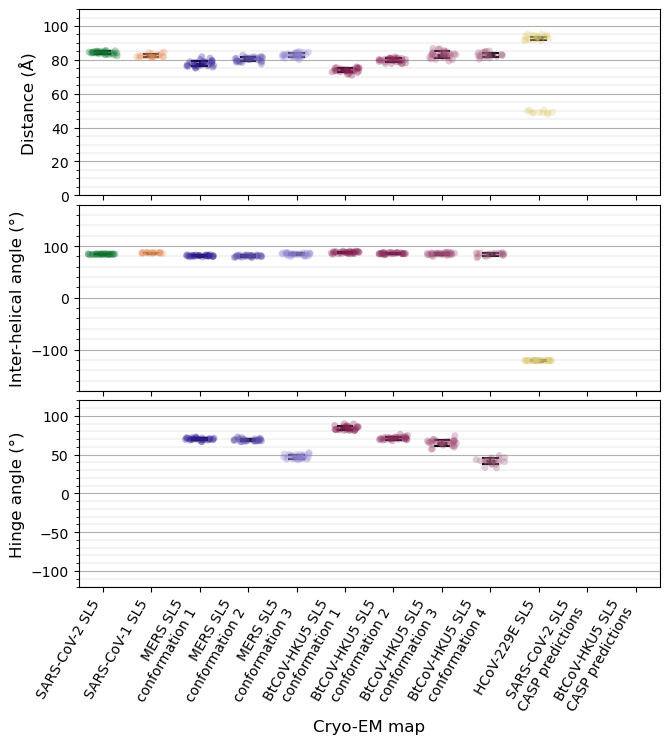

In [16]:
order=['SARS-CoV-2-',
       'SARS-CoV-1-', 
       'MERSconf1','MERSconf2','MERSconf3',
       'BtCoV-HKU5conf1', 'BtCoV-HKU5conf2','BtCoV-HKU5conf3','BtCoV-HKU5conf4', 
       'HCoV-229E-',
      'R1149-','R1156-']
color = ["#117733",
        "#E89562",
         "#342096","#5A4AA9","#9183D2",
        "#882255","#8E2E5E","#A24D77","#A25D80",
        "#DDCC77",
        "#44AA99","#AA4499"]
labels=['SARS-CoV-2 SL5',
       'SARS-CoV-1 SL5', 
       'MERS SL5\nconformation 1','MERS SL5\nconformation 2','MERS SL5\nconformation 3',
       'BtCoV-HKU5 SL5\nconformation 1', 'BtCoV-HKU5 SL5\nconformation 2',
        'BtCoV-HKU5 SL5\nconformation 3','BtCoV-HKU5 SL5\nconformation 4', 
       'HCoV-229E SL5',
       'SARS-CoV-2 SL5\nCASP predictions','BtCoV-HKU5 SL5\nCASP predictions']
fig, axes = plt.subplots(3,1,figsize=(7.5,7.5),sharex=True)
fig.subplots_adjust(hspace=0.05)
color_dict = {x:y for x,y in zip(order,color)}

plot_df = Y[(Y.modeling!='CASP') | (Y.models.isin(secok))]
plot_ang_df = Y[(Y.modeling!='CASP') | (Y.models.isin(secstackok))]

sns.stripplot(plot_df,x="sc",hue="sc",y="distance",order=order,palette=color_dict,ax=axes[0],
              legend=False,jitter=0.3,size=5,alpha=0.3)
sns.pointplot(plot_df[plot_df.loop=='ab'],x="sc",y="distance", hue=None, errorbar='sd',capsize=.3, ax=axes[0],order=order,
              color='k',join=False,errwidth=1.5,markers='_')
axes[0].set_ylabel("Distance (Å)",size=12)
sns.stripplot(plot_ang_df,x="sc",hue="sc",y="inter_helical_angle",order=order,
              palette=color_dict,ax=axes[1],legend=False,
             jitter=0.3,size=5,alpha=0.3)
sns.stripplot(plot_ang_df,x="sc",hue="sc",y="pivot_angle",order=order,
              palette=color_dict,ax=axes[2],legend=False,
             jitter=0.3,size=5,alpha=0.3)
sns.pointplot(plot_ang_df,x="sc",y="inter_helical_angle", hue=None, errorbar='sd',capsize=.3, ax=axes[1],order=order,
              color='k',join=False,errwidth=1.5,markers='_')
sns.pointplot(plot_ang_df,x="sc",y="pivot_angle", hue=None, errorbar='sd',capsize=.3, ax=axes[2],order=order,
              color='k',join=False,errwidth=1.5,markers='_')
axes[1].set_ylabel("Inter-helical angle (°)",size=12)
axes[2].set_ylabel("Hinge angle (°)",size=12)
axes[2].set_xlabel("Cryo-EM map",size=12)
from matplotlib.ticker import MultipleLocator
ml = MultipleLocator(20)
axes[1].yaxis.set_minor_locator(ml)
ml = MultipleLocator(5)
axes[0].yaxis.set_minor_locator(ml)
ml = MultipleLocator(10)
axes[2].yaxis.set_minor_locator(ml)
axes[0].grid(visible=True, which='major',axis='y')
axes[0].grid(visible=True, which='minor',axis='y',linewidth=0.2)
axes[1].grid(visible=True, which='major',axis='y')
axes[1].grid(visible=True, which='minor',axis='y',linewidth=0.2)
axes[2].grid(visible=True, which='both',axis='y')
axes[2].grid(visible=True, which='minor',axis='y',linewidth=0.2)
axes[1].set_ylim(-180,180)
axes[2].set_ylim(-120,120)
axes[0].set_ylim(0,110)

t=axes[2].set_xticklabels(labels,rotation=60,ha='right')

plt.savefig('dist_angle.svg')

In [17]:
# can add in manually measured HCoV-NL63 SL5 data
NL63_add = {'modeling':['approx']*12, 'species':['HCoV-NL63']*12, 
            'conformation':['A']*6+['B']*6, 'secondary structure':['-']*12, 'models':['-']*12,
       'distance':[94,96,84,86,39,41,89,91,54,56,64,66], 'sc':['HCoV-NL63_A']*6+['HCoV-NL63_B']*6, 'pt':['approxHCoV-NL63']*12}
df = pd.concat([df,pd.DataFrame(NL63_add)],ignore_index=True)